# Pairplot

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Basics

In [4]:
sns.set_style("darkgrid")

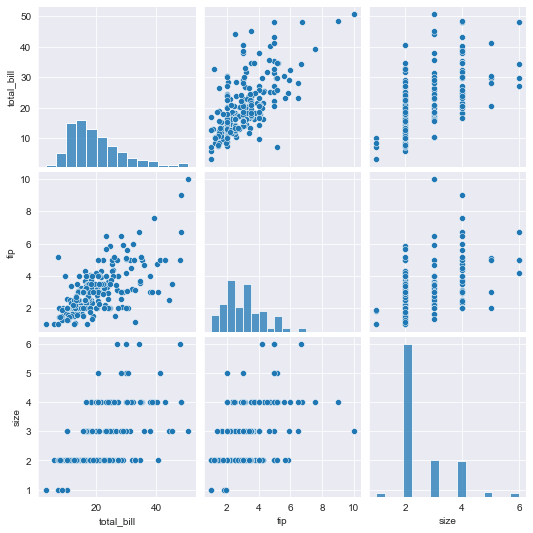

In [5]:
sns.pairplot(tips)

In [6]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Note that the axes tick labels correspond to the bivariate, relational plots and NOT the distribution plots.

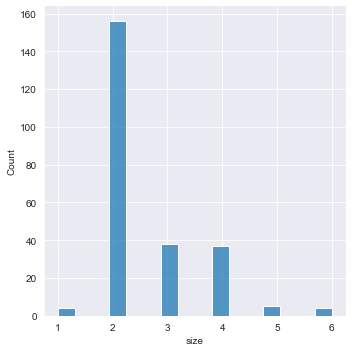

In [7]:
sns.displot(data=tips, x="size", kde=False)

## Plot Kinds

### diag_kind

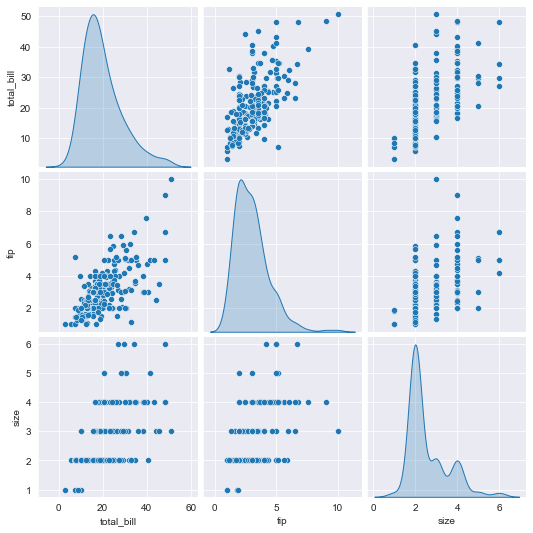

In [8]:
sns.pairplot(tips, diag_kind="kde")

### kind

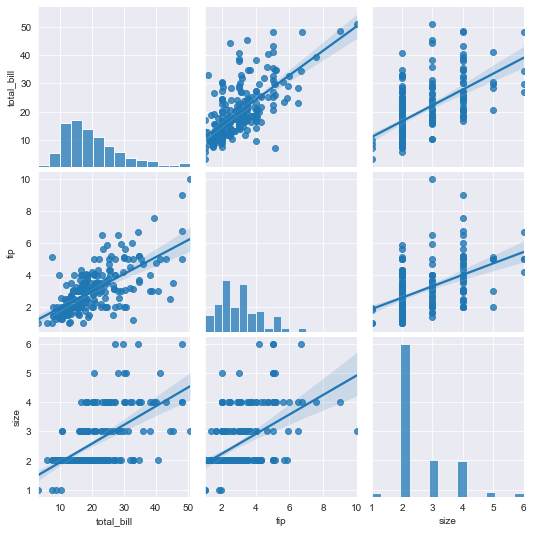

In [9]:
sns.pairplot(tips, kind="reg")

## Return PairGrid

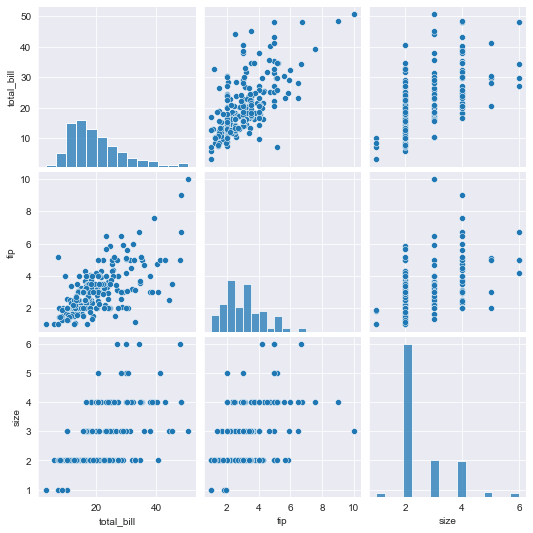

In [10]:
g = sns.pairplot(tips)

In [11]:
type(g)

seaborn.axisgrid.PairGrid

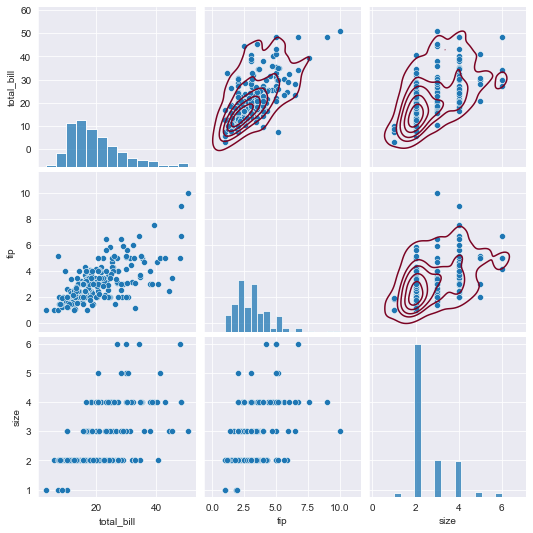

In [12]:
g = sns.pairplot(tips)
g.map_upper(sns.kdeplot, n_levels=6, color="xkcd:wine red")

## Categorical and Specific Variables

In [13]:
tips['weekend'] = tips.day.isin(['Sat', 'Sun'])

In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


### hue

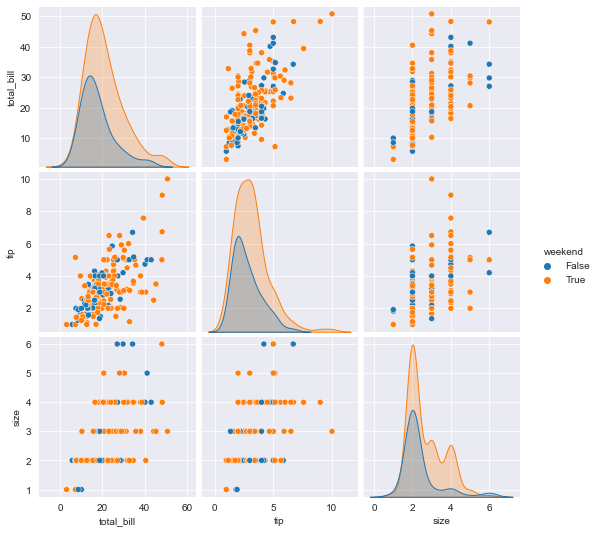

In [15]:
sns.pairplot(tips, hue="weekend")

In [16]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
weekend           bool
dtype: object

### vars, x_vars, y_vars

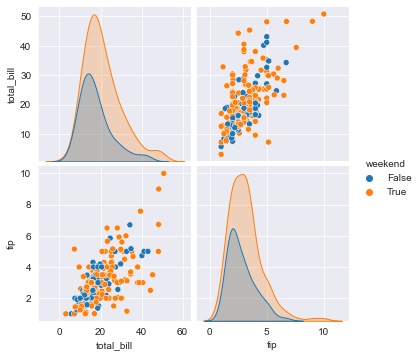

In [17]:
sns.pairplot(tips, hue="weekend", vars=["total_bill", "tip"])

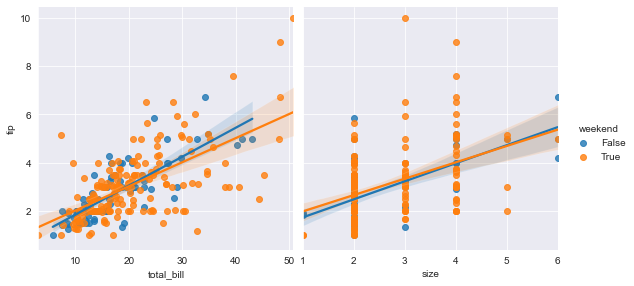

In [18]:
sns.pairplot(tips, hue="weekend",
             y_vars=["tip"],
             x_vars=["total_bill", "size"],
             kind="reg", height=4)

## Styling

In [19]:
del tips['weekend']

### height, aspect

In [20]:
from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
    sns.pairplot(tips, height=height, aspect=aspect)

In [21]:
interactive(size_widget, height=(1, 3.5, 0.5), aspect=(0.5, 2, 0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

### palette

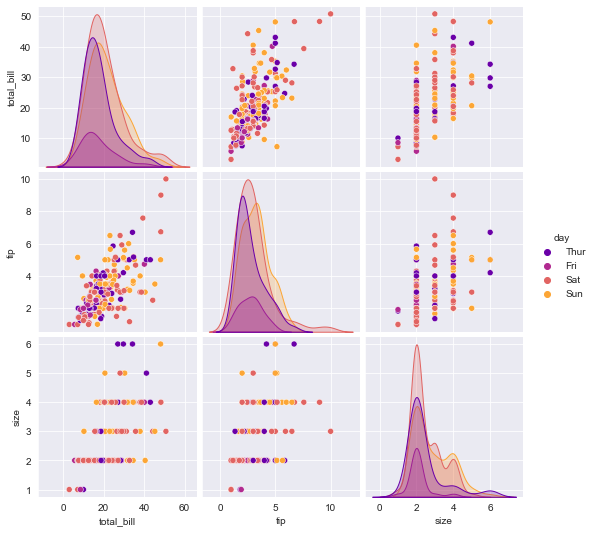

In [22]:
sns.pairplot(tips, hue="day", palette="plasma")

### diag_kws, plot_kws

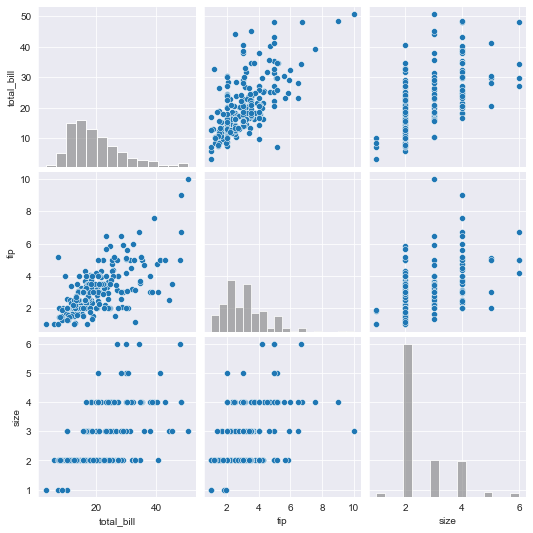

In [23]:
sns.pairplot(tips, diag_kws={"color": "gray", "alpha": 0.6})

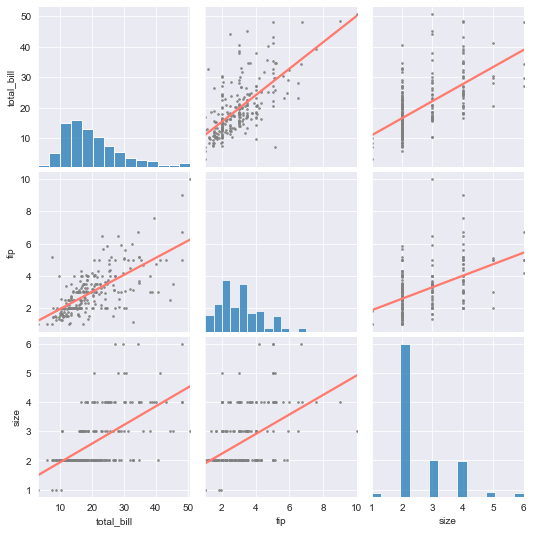

In [24]:
sns.pairplot(tips, 
             kind="reg",
             plot_kws={'ci':None, 'color': 'xkcd:salmon',
                       'scatter_kws': {'color': 'gray', 's': 3}
                      })